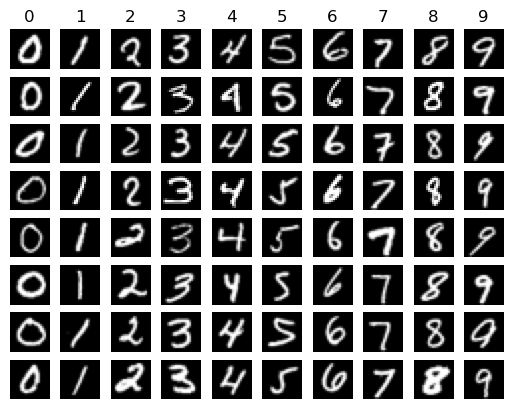

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

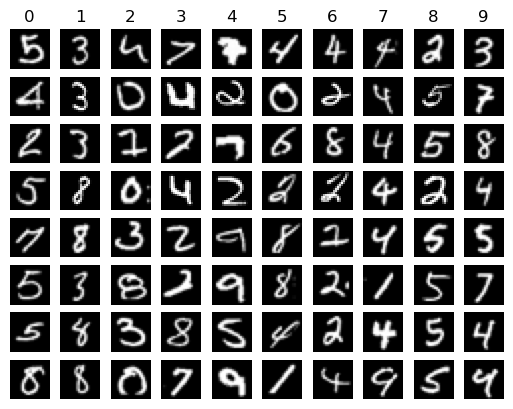

In [1]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from Handout_MNIST import MNIST


# load the MNIST_Light data
mnist = MNIST.MNISTData('Handout_MNIST/MNIST_Light/*/*.png')

# get_data() produces the subsets with already normalised (between 0.0 and 1.0) data
train_features, test_features, train_labels, test_labels = mnist.get_data()

# just show some of the images
mnist.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
mnist.visualize_wrong_class(y_pred, 8)



In [2]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from Handout_MNIST import MNIST
from sklearn import datasets

# load the MNIST_Light data

digits = datasets.load_digits()

num_examples = len(digits.data)
num_split = int(0.7*num_examples) 

train_features = digits.data[:num_split]
test_features = digits.data[num_split:]

train_labels = digits.target[:num_split]
test_labels = digits.target[num_split:]
 

# just show some of the images
#digits.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
#digits.visualize_wrong_class(y_pred, 8)



Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix SKLearn GNB:
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6  1  0]
 [ 0  2  0

In [3]:
from collections import Counter
import numpy as np
import math
from Handout_MNIST import MNIST

class NBC:
    priors = []
    means = []
    varis = []
    label_set = []
    nbr_pos = 0
    nbr_values = 0
    classifications = []

    def fit_NB(self, train_features, train_labels):
        #p(Ck)
        freq = Counter(train_labels)
        self.priors = [(freq[x] / len(train_labels)) for x in sorted(freq)]
     #   print(f"Priors: {priors}" + '\n')

        #class frequency, index = class
        freq = [freq[x] for x in sorted(freq)]
        #set of all labels
        self.label_set = set(train_labels)
        #number of pixels
        self.nbr_pos = len(train_features[0])
        #number of values
        self.nbr_values = int(max(map(max, train_features))) + 1
        #p(x|Ck)
        frequencies = [[[0 for _ in range(nbr_values)] for _ in range(nbr_pos)] 
                       for _ in range(len(label_set))]
        counter = 0
        for clas in train_labels:
            for pos in range(nbr_pos):
                frequencies[clas][pos][int(train_features[counter][pos])] += 1
            counter += 1

        for clas in label_set:
            scalar = 1/freq[clas]
            for pos in range(nbr_pos):
                for value in range(nbr_values):
                    frequencies[clas][pos][value] *= scalar
        self.likelihood = frequencies

    def fit_GNB(self, train_features, train_labels):
        #p(Ck)
        freq = Counter(train_labels)
        self.priors = [(freq[x] / len(train_labels)) for x in sorted(freq)]

        #class frequency, index = class
        freq = [freq[x] for x in sorted(freq)]
         #set of all labels
        self.label_set = set(train_labels)
        #number of pixels
        self.nbr_pos = len(train_features[0])
        #number of values
        self.nbr_values = len(set(np.ravel(train_features)))
        nbr_pictures = len(train_features)
        #p(x|Ck) 
        sorted_pics = [[] for _ in self.label_set]
        mean = [[0 for _ in range(self.nbr_pos)] for _ in self.label_set]
        squared_mean = [[0 for _ in range(self.nbr_pos)] for _ in self.label_set]
        var = [[0 for _ in range(self.nbr_pos)] for _ in self.label_set]

        smoothing_factor = 0.01

        for index, clas in enumerate(train_labels):
            sorted_pics[clas].append(train_features[index]) 
            for pos in range(self.nbr_pos):
                mean[clas][pos] += train_features[index][pos]
                squared_mean[clas][pos] += train_features[index][pos]**2

        for clas in self.label_set:
            for pos in range(self.nbr_pos):
                mean[clas][pos] = mean[clas][pos]/freq[clas]
                squared_mean[clas][pos] = squared_mean[clas][pos]/freq[clas]
                var[clas][pos] = abs(squared_mean[clas][pos] - mean[clas][pos]) + smoothing_factor
        self.means = mean
        self.varis = var 

    def predictGNB(self, test_features):
        y_pred = [0 for _ in range(len(test_features))]
        smoothing_factor = 10**(-9)
        class_probs = [1 for _ in self.label_set]
        gaussians = [[0 for _ in range(self.nbr_pos)] for _ in self.label_set] # matrix with nbr of pics x pic len dimensions
        
        for test_index, pic in enumerate(test_features):
            for clas in self.label_set:
                for pos, pix_val in enumerate(pic):
                    class_probs[clas] += math.log((1/(math.sqrt(2*math.pi*self.varis[clas][pos])))*math.exp(-1*(((pix_val-self.means[clas][pos])**2)/(2*self.varis[clas][pos])))+smoothing_factor)
                class_probs[clas] *= self.priors[clas]
            y_pred[test_index] =  class_probs.index(max(class_probs))
        return y_pred


    def predict(self, test_features):
        default_value = 0 #for wrong classifications
        self.classifications = [default_value for _ in range(len(test_features))]
        for pic in range(len(test_features)):
            prob = [1 for _ in self.label_set]
            for clas in self.label_set:
                for pos in range(self.nbr_pos):
                    prob[clas] *= self.likelihood[clas][pos][int(test_features[pic][pos])]
                prob[clas] *= self.priors[clas]
            if sum(prob) != 0:
                self.classifications[pic] = prob.index(max(prob))
        return self.classifications

digits = datasets.load_digits()
split = int(0.7*len(digits.data))
training_features = digits.data[:split]
training_labels = digits.target[:split]
testing_features = digits.data[split:]
testing_labels = digits.target[split:]

gnb = NBC()
#gnb.fit_NB(training_features, training_labels)
gnb.fit_GNB(training_features/16, training_labels)
y_predicted = gnb.predictGNB(testing_features)

print("Classification report GNB (digits dataset):\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix GNB (digits dataset):\n%s" % metrics.confusion_matrix(test_labels, y_pred))

#print("Classification report digits NBC:\n%s\n"
#  % (metrics.classification_report(testing_labels, y_predicted)))
#print("Confusion matrix digits NBC:\n%s" % metrics.confusion_matrix(testing_labels, y_predicted))


# load the MNIST_Light data
mnist = MNIST.MNISTData('Handout_MNIST/MNIST_Light/*/*.png')

# get_data() produces the subsets with already normalised (between 0.0 and 1.0) data
train_features, test_features, train_labels, test_labels = mnist.get_data()
# just show some of the images
#mnist.visualize_random()
gnb.fit_GNB(train_features, train_labels)
y_pred = gnb.predictGNB(test_features)

print("Classification report GNB (MNIST Light):\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix GNB (MNIST Light):\n%s" % metrics.confusion_matrix(test_labels, y_pred))

Classification report GNB (digits dataset):
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.65      0.79      0.71        53
           2       0.98      0.81      0.89        53
           3       0.92      0.64      0.76        53
           4       1.00      0.86      0.92        57
           5       0.83      0.93      0.87        56
           6       0.96      0.98      0.97        54
           7       0.73      0.83      0.78        54
           8       0.59      0.71      0.64        52
           9       0.82      0.73      0.77        55

    accuracy                           0.83       540
   macro avg       0.84      0.82      0.83       540
weighted avg       0.84      0.83      0.83       540


Confusion matrix GNB (digits dataset):
[[51  0  0  0  0  0  0  0  2  0]
 [ 0 42  1  0  0  0  0  0  3  7]
 [ 0  5 43  1  0  0  1  0  1  2]
 [ 0  3  0 34  0  3  0  2 11  0]
 [ 1  0  0  0 49  0  0  6